# L2: Text classification

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [1]:
import pandas as pd
import bz2

with bz2.open("speeches-201718.json.bz2") as source:
    speeches_201718 = pd.read_json(source)

with bz2.open("speeches-201819.json.bz2") as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [2]:
speeches_201718.head()

,id,party,words
0,H5-002-004,S,eders majestäter eders kungliga högheter herr ...
1,H5-003-001,V,aktuell debatt om situationen för ensamkommand...
2,H5-003-002,S,herr talman och ledamöter jag vill börja med a...
3,H5-003-003,M,herr talman åhörare den här debatten handlar a...
4,H5-003-004,SD,herr talman ansvar och rättssäkerhet är två or...


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [3]:
training_data, test_data = speeches_201718, speeches_201819

For later reference, we store the sorted list of party abbreviations.

In [4]:
parties = sorted(training_data["party"].unique())
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


## Problem 1: Visualization

Your first task is to get to know the data better by plotting a simple visualization.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to compare the two data frames with respect to the distribution of the speeches over the different parties. Write code to generate two bar plots that visualize this information, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and compare them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

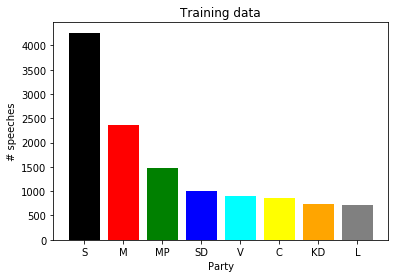

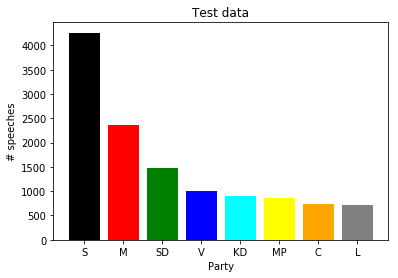

In [6]:
import matplotlib.pyplot as plt

# Plotting training data.
plt.bar(x = training_data['party'].value_counts().index, 
        height = speeches_201718['party'].value_counts(),
        color = ['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'grey'])
plt.title('Training data')
plt.xlabel('Party')
plt.ylabel('# speeches')
plt.show()

# PLotting test data.
plt.bar(x = test_data['party'].value_counts().index, 
        height = speeches_201718['party'].value_counts(),
        color = ['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'grey'])
plt.title('Test data')
plt.xlabel('Party')
plt.ylabel('# speeches')
plt.show()

In [7]:
# Printing election results from 2014 and 2018.
pd.DataFrame({"2014" : [31.01, 23.33, 12.86, 6.89, 6.11, 5.72, 5.42, 4.57],
              "2018" : [28.26, 19.84, 17.53, 4.41, 8.61, 8.00, 5.49, 6.32]},
             index = ["S", "M", "SD", "MP", "C", "V", "FP/L", "KD"])

,2014,2018
S,31.01,28.26
M,23.33,19.84
SD,12.86,17.53
MP,6.89,4.41
C,6.11,8.61
V,5.72,8.00
FP/L,5.42,5.49
KD,4.57,6.32


In general, in 2017/2018 the total number of speeches was higher. Parties S and M in both years gave the 1st and 2nd most number of speeches. Party L is always the party with the least speeches.
From the 2014 election results we can see that the largest two parties S and M are also the parties that held the most speeches, same goes for the 2018 election.

## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. vectorize the speeches in the training data
2. instantiate and fit the Naive Bayes model
3. evaluate the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the evaluation you can use the function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report per-class precision, recall and F1, as well as overall accuracy.

In [5]:
# Instantiate pipeline.
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
nb_pipeline = make_pipeline(CountVectorizer(), # Vectorizing speeches in training data. 
                            MultinomialNB()) # Training Multinomial Naive Bayes classifier.

# Using pipeline to train naive bayes classifier on training data.
nb_classifier = nb_pipeline.fit(training_data["words"], training_data["party"])  

# Evaluating model on test data.
test_predictions = nb_classifier.predict(test_data["words"])
from sklearn.metrics import classification_report
print(classification_report(test_data["party"], test_predictions))

              precision    recall  f1-score   support

           C       0.63      0.04      0.07       671
          KD       0.70      0.02      0.03       821
           L       0.92      0.02      0.04       560
           M       0.36      0.68      0.47      1644
          MP       0.36      0.25      0.29       809
           S       0.46      0.84      0.59      2773
          SD       0.57      0.12      0.20      1060
           V       0.59      0.15      0.24       950

   micro avg       0.43      0.43      0.43      9288
   macro avg       0.57      0.26      0.24      9288
weighted avg       0.52      0.43      0.34      9288



Would you have expected the results that you got?

We would have expected to get a similar result. The overall classififer's accuracy is 43%. Since there are eight different class values, it is not easy to always predict the correct class. The Naive Bayes classifier assumes the features to be independet of each other which is a naive assumption. To assess the accuracy, we need to compare it to the accuracy of other classifiers, thouhgh.

## Problem 3: Baseline

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline for text classification is **Most Frequent Class (MFC)**. One way to think of this baseline is as a classifier that, for every document, predicts that class which appears most often in the training data.

Determine the most frequent class in the 2017/2018 data. What is the accuracy of the MFC baseline on the test data? Given this baseline accuracy, how do you assess the results of the Naive Bayes classifier from Problem&nbsp;2? Answer with a short text.

In [6]:
# Identifying most frequent class within training data.
print(training_data["party"].value_counts())
'''It follows that the most frequent class within the training data is class "S", as it also could be seen already in the 
plot above.'''

# Computing accuracy of predictions for test data using always most Frequent Class as the prediction.
import numpy as np
print(classification_report(test_data["party"], np.repeat("S", len(test_data))))

S     4261
M     2370
MP    1481
SD    1010
V      894
C      865
KD     743
L      719
Name: party, dtype: int64
              precision    recall  f1-score   support

           C       0.00      0.00      0.00       671
          KD       0.00      0.00      0.00       821
           L       0.00      0.00      0.00       560
           M       0.00      0.00      0.00      1644
          MP       0.00      0.00      0.00       809
           S       0.30      1.00      0.46      2773
          SD       0.00      0.00      0.00      1060
           V       0.00      0.00      0.00       950

   micro avg       0.30      0.30      0.30      9288
   macro avg       0.04      0.12      0.06      9288
weighted avg       0.09      0.30      0.14      9288



C:\Users\Lennart\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The obtained overall accurary is 30%, so it's much lower than the accuracy of the Naive Bayes classifier. However, the classififer of course only predits the class "S" to every input. Thus, for all speeches to be classified that are not from the party "S", the accuracy is 0%. As a consequence, the Naive Bayes classifier performs better.

## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Discuss your findings in a short text. Would you argue that undersampling make sense for the task of predicting the party of a speaker?

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [20]:
# Performing undersampling.
## Identifying number of samples for each party so that training data would be balanced over parties. 
n_samples_desired = training_data['party'].value_counts().min()
## Initializing empty data frame.
training_data_balanced = pd.DataFrame()
## Sampling training data for each party and append sampled data to initialized data frame.
for party in training_data['party'].unique():
    # Subsetting part of training data referring to the party.
    train_party = training_data[training_data.party == party]
    # Sampling n_samples_desired times from subset without replacement.
    train_party = train_party.sample(n = n_samples_desired, replace = False)
    # Appending sampled training data of specific party to initialized data frame.
    training_data_balanced = training_data_balanced.append(train_party)
## Checking number of rows of balanced training data.
print("Number of speeches for balanced data: " + str(len(training_data_balanced)))

# Redoing process from Problem 2 on balanced data.
## Using pipeline from Problem 2 to train naive bayes classifier on balanced data.
nb_classifier = nb_pipeline.fit(training_data_balanced["words"], training_data_balanced["party"])  
# Evaluating model on test data.
test_predictions = nb_classifier.predict(test_data["words"])
print(classification_report(test_data["party"], test_predictions))

Number of speeches for balanced data: 5752
              precision    recall  f1-score   support

           C       0.26      0.45      0.33       671
          KD       0.29      0.38      0.33       821
           L       0.28      0.43      0.34       560
           M       0.41      0.48      0.44      1644
          MP       0.34      0.40      0.37       809
           S       0.80      0.28      0.41      2773
          SD       0.45      0.40      0.42      1060
           V       0.37      0.56      0.45       950

   micro avg       0.40      0.40      0.40      9288
   macro avg       0.40      0.42      0.39      9288
weighted avg       0.49      0.40      0.40      9288



The overall accuracy (now 40%) decreased compared to the accuracy in Problem 2. Thus, the new classifier which has been built on the balanced training dataset performs worse compared to before. The reason might be that the amount of training data has been decreased a lot.

## Problem 5: Confusion matrix

A **confusion matrix** is a specific table layout that is useful when analysing the performance of a classifier. In this matrix, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with gold-standard class $i$ was predicted as belonging to class $j$.

In scitkit-learn, the confusion matrix of a classifier is computed by the function [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Your task is to use the confusion matrix to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses $p$ with when it predicts the party of a speaker.

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true = test_data["party"], 
                                                    y_pred = test_predictions),
                                   index = parties, 
                                   columns = parties)
print(confusion_matrix_df)

      C   KD    L    M   MP    S   SD    V
C   303   69   42   97   47   13   44   56
KD   95  312   58  165   31   25   56   79
L    59   48  240   70   23   16   35   69
M   229  176  127  787   73   33  105  114
MP   64   55   58   98  321   73   43   97
S   248  228  168  460  349  772  177  371
SD  106  103  108  144   40   17  426  116
V    59   71   59  109   47   12   59  534


We use index and columns according to the sorted parties, because we did not specify labels within confusion_matrix().
Within the description of the label parameter for the function confusion_matri(), it says the following: 
"If none is given, those that appear at least once  in y_true or y_pred are used in sorted order.

The left lables refer to the true values, the labels on top refer to the predictions.

Our goal is to find for each party the other party that most have been predicted instead of the true party by our classifer.
Thus, for each party, we need to find the other party with the maximum number of predictions which is not the party itself.
We achieve this by finding the maximum value for each row which does not correspond the true party itself.
First, we set the diagonal of the confusion matrix to zero so that the true class is considered in our analysis.
Afterwards, rowwise, we are looking for the maximum value. The corresponding column name then is the party we are looking for.

In [22]:
# Setting diagonal of confusion matrix to zero.
for i in range(len(confusion_matrix_df)):
    confusion_matrix_df.iloc[i, i] = 0

# Row-wise identfying label of maximum value.
confusion_matrix_df.idxmax(axis = "columns")

C     M
KD    M
L     M
M     C
MP    M
S     M
SD    M
V     M
dtype: object

## Problem 6: Grid search

Until now, you have been using the vectorizer and the Naive Bayes classifier with their default hyperparameters. When working with real-world applications, you would want to find settings for the hyperparameters that maximize the performance for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. (Why would that be a bad idea?) Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

Implement a grid search with 5-fold cross-validation to find the optimal parameters in a grid defined by the following choices for the hyperparameters:

* In the vectorizer, try a set-of-words model instead of the default bag-of-words model (two possible parameter values).
* Also in the vectorizer, try extracting $n$-grams up to $n = 2$ (two possible parameter values).
* In the Naive Bayes classifier, try using additive smoothing with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library. Print the results of your best model, along with the parameter values that yielded these results.

In [26]:
# Redefining pipeline by including names for each pipeline-step.
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
nb_pipeline = Pipeline([('vect', CountVectorizer()), # Vectorizing speeches in training data. 
                        ('clf', MultinomialNB())]) # Training Multinomial Naive Bayes classifier.

# Defining parameters to loop over. Names connected to name of pipeline-step.
parameters = {'vect__binary': (True, False)}#, # refers to binary-parameter of CountVectorizer().
              #'vect__ngram_range': [(1, 1), (1, 2)], # refers to ngram-parameter of CountVectorizer().
              #'clf__alpha': (1, 0.1)} # refers to alpha-parameter of MultinomialNB().

# Creating GridSearch-instance.
from sklearn.model_selection import GridSearchCV
gs_nb_classifier = GridSearchCV(nb_pipeline, # Defined pipeline.
                                parameters, # Specified parameters.
                                cv = 5, # Number of folds.
                                iid = False, 
                                n_jobs = -1) # Grid search will detect how many cores are installed and use them all.

# Training classifier for each parameter setting.
gs_nb_classifier = gs_nb_classifier.fit(training_data["words"], training_data["party"])

# Evaluating model on training data.
gs_nb_classifier

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'vect__binary': (True, False)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [38]:
gs_nb_classifier.best_score_

0.5065151150080454

In [39]:
gs_nb_classifier.best_params_
train_pred = gs_nb_classifier.predict(training_data["words"])
test_pred = gs_nb_classifier.predict(test_data["words"])

In [40]:
from sklearn.metrics import classification_report
print(classification_report(training_data["party"], train_pred))
print(classification_report(test_data["party"], test_pred))

              precision    recall  f1-score   support

           C       0.98      0.45      0.62       865
          KD       0.98      0.33      0.49       743
           L       1.00      0.36      0.53       719
           M       0.62      0.95      0.75      2370
          MP       0.89      0.64      0.74      1481
           S       0.74      0.96      0.84      4261
          SD       0.96      0.59      0.73      1010
           V       0.95      0.66      0.78       894

   micro avg       0.76      0.76      0.76     12343
   macro avg       0.89      0.62      0.69     12343
weighted avg       0.82      0.76      0.74     12343

              precision    recall  f1-score   support

           C       0.63      0.04      0.07       671
          KD       0.70      0.02      0.03       821
           L       0.92      0.02      0.04       560
           M       0.36      0.68      0.47      1644
          MP       0.36      0.25      0.29       809
           S       0.46 

## Problem 6: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model. Did you manage to get better results than the ones that you obtained in Problem&nbsp;5? Answer with a short text.

In [8]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Redefining pipeline by including names for each pipeline-step.
dt_pipeline = Pipeline([('vect', CountVectorizer()), # Vectorizing speeches in training data. 
                        ('clf', tree.DecisionTreeClassifier())]) # Training decision tree classifier.

# Defining parameters to loop over. Names connected to name of pipeline-step.
parameters = {'clf__criterion': ('gini','entropy')} # refers to criterion-parameter of DecisionTreeClassifier()().

# Creating GridSearch-instance.
gs_dt_classifier = GridSearchCV(dt_pipeline, # Defined pipeline.
                                parameters, # Specified parameters.
                                cv = 5, # Number of folds .
                                iid = False, 
                                n_jobs = -1) # Grid search will detect how many cores are installed and use them all.

# Training classifier for each parameter setting.
gs_dt_classifier = gs_dt_classifier.fit(training_data["words"], training_data["party"])

# Evaluating model on training data.
print(gs_dt_classifier.best_params_)
print(gs_dt_classifier.best_score_)

{'clf__criterion': 'gini'}
0.42185426473048004


As it can be seen, the best accuracy obtained is only around 42% which is less than the accuracy obtained by the Naive Bayes classifier from before. Thus, this decision tree classifier did not manage to get better results.

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>